# Temel Bileşen Analizi

Bu ısınma alıştırması, **Temel Bileşen Analizi**'nin nasıl çalıştığına dair sezgisel bir fikir edinmenize yardımcı olacaktır. 

## (1) Veri Oluşturma

**100 gözlem** ve **birbiriyle ilişkili (korelasyonlu) 2 özellik** içeren bir veri seti istiyoruz.

👇 Verinizi oluşturmak için aşağıdaki hücreyi çalıştırın  
💡 İki özellik arasındaki (yüksek) korelasyona dikkat edin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 100 gözlem ve 2 ilişkili özellik içeren bir veri kümesi oluşturun.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ İki özelliğinizi birbirine göre dağılım grafiği çizin.

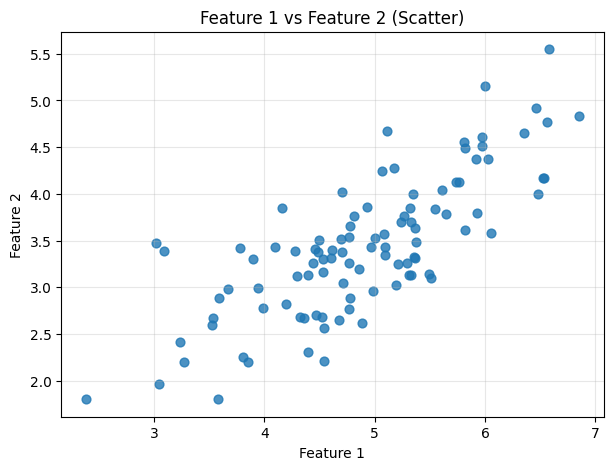

In [2]:
# İki özelliğin birbirine göre dağılımını (scatter) çiziyoruz
plt.figure(figsize=(7, 5))
plt.scatter(X[0], X[1], s=40, alpha=0.8)

plt.title("Feature 1 vs Feature 2 (Scatter)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.show()


☝️ Özellikler arasındaki **pozitif korelasyonu** tespit edebilirsiniz.

Gözlemlerimiz tek bir çizgi boyunca sıkışmış durumda; aralarındaki farkları ayırt etmek kolay değil.

💡 PCA, bu korelasyonu ortadan kaldıran yönleri (diğer adıyla **“principal components” – temel bileşenler**) bulmamıza yardımcı olacaktır.

## (2) Temel Bileşenler

👉 `sklearn`'den `PCA`'yı içe aktarın ve `n_components=2` ile bir model oluşturun

❓Bunu `X`'inize uyarlayın ve `pca`'ya atayın

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)


,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",2
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

Eğitilmiş `PCA` nesnesinin üç özniteliğine odaklanalım:

* `pca.components_`: Varyansın en iyi şekilde açıklandığı yönleri gösteren özvektörler kümesi; yani **maksimum varyans yönleri** (konvansiyon gereği birim uzunluğa normalize edilmişlerdir).

* `pca.explained_variance_`:  
  $Var(\text{Temel Bileşen})$, her bir temel bileşenin açıkladığı varyans (kovaryans matrisi  
  $ \Sigma = \frac{1}{n - 1} X^T X $’in özdeğerleri ile verilir).

* `pca.explained_variance_ratio_`:  
  $ \frac{Var(\text{Temel Bileşen})}{\text{Toplam Varyans}}$, her bir temel bileşenin toplam varyansın ne kadarını açıkladığını gösterir.

In [5]:
# Her bir ana bileşenin vektör koordinatları
pca.components_

array([[ 0.79286897,  0.60939216],
       [-0.60939216,  0.79286897]])

In [6]:
# Her bir ana bileşen için açıklanan varyans
# Önem sırasına göre azalan şekilde sıralanmıştır
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [7]:
# Her bir ana bileşen için açıklanan varyans oranı
# Önem sırasına göre azalan şekilde sıralanmıştır

# Her bir ana bileşen için açıklanan varyans
# verilerin toplam varyansına bölünmüştür
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

PC1 → toplam bilginin %89’unu
PC2 → sadece %11’ini açıklıyor
📌 Yani bu veri pratikte neredeyse tek boyutlu.

PCA, verideki toplam varyansı en iyi açıklayan ve birbirine dik yeni eksenler (temel bileşenler) bulur; ilk bileşen en yüksek bilgiyi taşırken, sonraki bileşenler kalan varyansı açıklar.


👇 Aşağıdaki hücreyi çalıştırarak iki ana bileşeninizi görselleştirin.

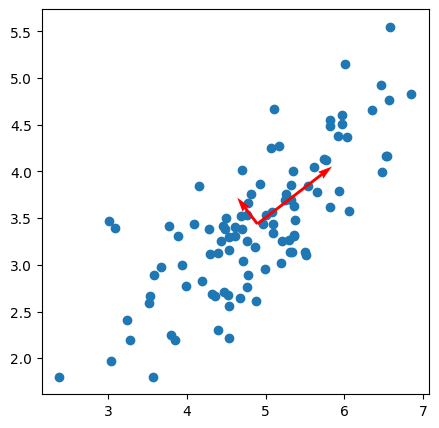

In [8]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Aynı “birimleri” karşılaştırmak için uzunluklarının karekökü
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

💡 Vektörün uzunluğu, veri kümesinin bu eksene yansıtıldığında standart sapmasının bir ölçüsüdür!

💡 Daha sonra bu yönleri (bu “ana bileşenleri”) kullanarak gözlemlerimizin davranışlarının çoğunu “açıklayabiliriz” - gözlemler arasındaki farkların çoğu bu eksenler boyunca gerçekleşir. 

## (3) PCA uygulayın

Bu bileşenleri kullanarak veri setimizdeki her bir örneği, maksimum varyans yönlerine projekte edebiliriz.

❓ ***Sorular*** ❓

1. `pca` nesnesinin `transform` metodunu `X` üzerinde kullanın ve sonucu `X_transformed` değişkenine kaydedin.  
2. `X_transformed` içindeki projekte edilmiş özellikleri birbirlerine karşı grafiğe dökün.  
3. `X_transformed` içindeki dönüştürülmüş özellikler arasındaki korelasyonu hesaplayın.

In [9]:
# X'i PCA bileşenleri (PC1, PC2) uzayına projekte ediyoruz
X_transformed = pca.transform(X)

# Kontrol: 100 gözlem, 2 bileşen => (100, 2)
X_transformed.shape


(100, 2)

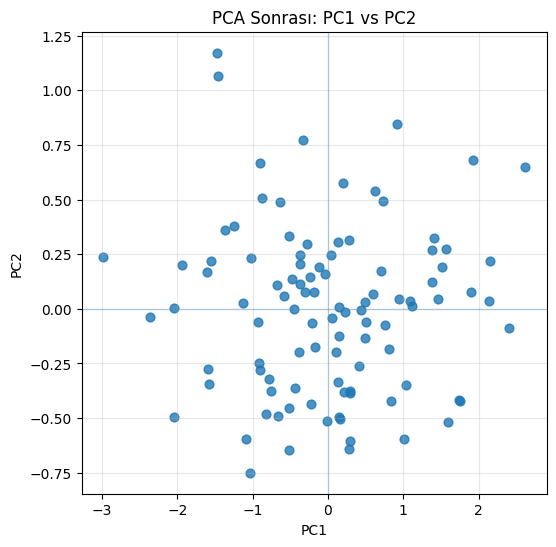

In [10]:
# PCA sonrası yeni iki özelliği (PC1, PC2) birbirine göre çiziyoruz
plt.figure(figsize=(6, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=40, alpha=0.8)

plt.title("PCA Sonrası: PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, linewidth=1, alpha=0.3)
plt.axvline(0, linewidth=1, alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()
# SENİN KODUN BURAYA

In [11]:
# PCA bileşenleri teorik olarak korelasyonsuzdur (uncorrelated)
corr_pca = np.corrcoef(X_transformed[:, 0], X_transformed[:, 1])[0, 1]
corr_pca


np.float64(-7.816852744564075e-15)

In [12]:
pd.DataFrame(X_transformed).corr().round(3)


,0,1
0,1.0,-0.0
1,-0.0,1.0


PCA transform, her gözlemi PC1–PC2 eksenlerine projekte ederek yeni (korelasyonsuz) özellikler üretir ve böylece veriyi daha anlamlı bir koordinat sisteminde ifade eder.

☝️ Dönüştürülmüş özellikleriniz arasında hiçbir korelasyon yoktur.  

Bu, gözlemler arasında davranışları incelemek daha kolay hale getirir, çünkü artık tek bir çizgi üzerinde toplanmış değildirler.

🏁 **Not defterinizi PUSH etmeyi unutmayın.**  

Günün görevlerini yerine getirin ve zamanınız olursa buraya geri dönün 😉

## (Opsiyonel) Scaling'in küçük bir yardımıyla

`PCA` ile elde edilen **projeksiyonların**, aslında başlangıçtaki `X` matrisi ile *transpoze edilmiş* bileşenlerin (yani `pca.components_` ile elde edilen özvektörlerin) noktasal çarpımından ibaret olduğunu unutmayın.

👉 Noktasal çarpımı kullanarak projekte edilmiş değerleri **manuel olarak** hesaplayın:  
$X \cdot PC^T$

❓ `np.allclose` kullanarak, elde ettiğiniz `X_transformed` ile hesapladığınız  $X \cdot PC^T$ sonucunun **aynı olup olmadığını** kontrol edin.

In [14]:
PC = pca.components_.T  # (2,2)
X_manual = np.dot(X - X.mean(axis=0), PC)
np.allclose(X_transformed, X_manual)



True

Eşit değil 😱  

`sklearn`'in `PCA`'sı indirgemeyi uyguladığında, bunu *merkezlenmiş* ancak *ölçeklenmemiş* bir `X` üzerinde yapar.

Bu, `PCA().transform(X)`'in aslında `np.dot(X - X.mean(axis=0), PC)` ile eşdeğer olduğu anlamına gelir.

In [15]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

True

Bu nedenle, `PCA` kullanırken, verilerinizi öncelikle ölçeklendirmenizi, daha doğrusu standartlaştırmanızı ve böylece verilerin merkezlenmesini öneririz.

Bu şekilde, `PCA.transform()` kullanmak veya ana bileşenlerle nokta çarpımı yapmak eşdeğer olacaktır.

Sklearn PCA, projeksiyonu ham X üzerinden değil, önce ortalamayı çıkararak merkezlediği (X − mean) veri üzerinden hesaplar; bu yüzden PCA.transform(X) ≈ (X − mean) · PCᵀ olur.
